# 1D Heat Condution

Given: The physics of the situation is governed by the differential equation of _pure diffusion_:

$$
\dfrac{\mathrm{d}^2 T\left(x\right)}
{\mathrm{d}x^2}=
0
$$

subject to the

- Initial condition: $T\left(x\right)=0$ for $x < 1$.
- Boundary conditions: $T\left(0\right)=0$, $T\left(1\right)=1$.

Objective: To calculate the temperature distribution, $T\left(x\right)$ at equilibrium.

## Finite Difference Solution

1. Convert physical geometry into a computational mesh.

In [133]:
import matplotlib.pyplot as plt
import numpy as np
from typing import Tuple

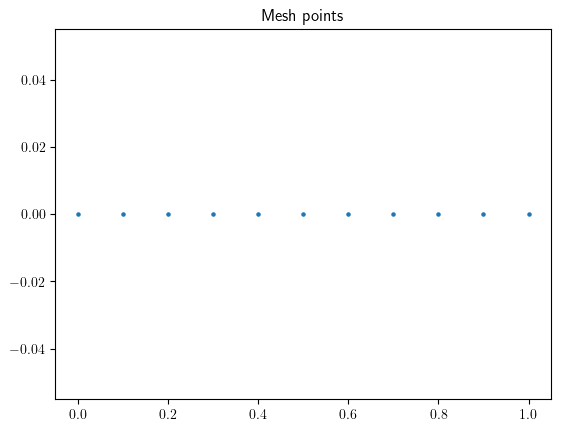

In [143]:
x = np.linspace(start=0, stop=1, num=11)
y = np.zeros_like(x)
plt.scatter(x=x, y=y, s=5)
plt.title("Mesh points");

2. Discretize the governing equation on this mesh using a numerical scheme.

$$
\dfrac{\mathrm{d}^2 T\left(t, x\right)}
{\mathrm{d}x^2}\approx
\dfrac{T_{i+1}-2T_i+T_{i-1}}{{\left(\Delta x\right)}^{2}}=
0.
\implies
T^{\left(k+1\right)}_{i}\approx
\dfrac{1}{2}
\left(T^{\left(k\right)}_{i+1}+T^{\left(k\right)}_{i-1}\right).
$$

In [172]:
def pure_diffusion_solver(x: np.array = np.linspace(start=0, stop=1, num=11), tolerance: float = 1e-8, max_iterations: float = 400) -> Tuple[int, float, np.array]:
    iteration = 0
    numeric_error = 1.0
    T = np.zeros_like(x)
    T[-1] = 1  # Initial condition
    T_new = T.copy()

    while (numeric_error > tolerance) and (iteration < max_iterations):
        T_new[1:-1] = 0.5 * (T[2:] + T[:-2])
        numeric_error = np.sum(np.abs(T_new - T))
        iteration += 1
        T = T_new.copy()

    return iteration, numeric_error, T

In [173]:
iteration, numeric_error, T = pure_diffusion_solver()

In [174]:
numeric_error

9.513829862806134e-09

In [175]:
iteration

336

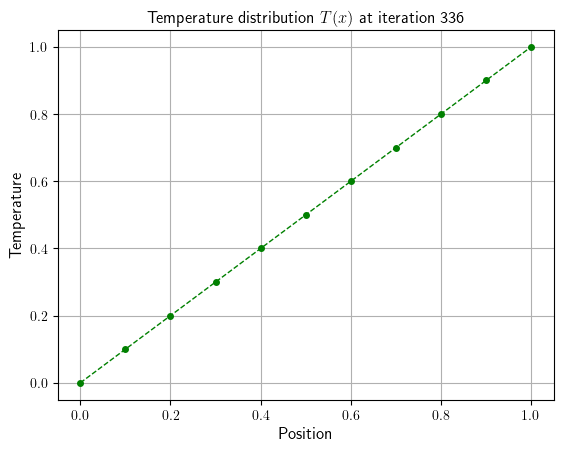

In [206]:
plt.plot(x, T, "go--", linewidth=1, markersize=4)
plt.xlabel("Position", fontsize=12)
plt.ylabel("Temperature", fontsize=12)
plt.grid()
plt.title(f"Temperature distribution $T(x)$ at iteration {iteration}", fontsize=12);

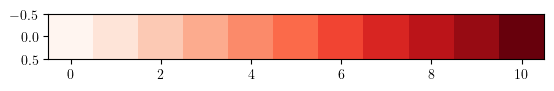

In [177]:
plt.imshow(T[np.newaxis], cmap="Reds");

### Discretization exercise

1D convection diffusion equation

$$
U\left(x\right)
\dfrac{\mathrm{d}T\left(x\right)}{\mathrm{d}x}+
\dfrac{\mathrm{d}^{2}T\left(x\right)}{\mathrm{d}x^{2}}
=0.
$$

Use a central difference based discretization for both the derivatives:

$$
T^{\left(k+1\right)}_{i}=
\left(\dfrac{1}{2}+\dfrac{U\left(x\right)\Delta x}{4}\right)T^{\left(k\right)}_{i+1}+
\left(\dfrac{1}{2}-\dfrac{U\left(x\right)\Delta x}{4}\right)T^{\left(k\right)}_{i-1}.
$$

In [250]:
x, dx = np.linspace(start=0, stop=1, num=10, retstep=True)
max_iterations = 300
tolerance = 1e-8
iteration = 0
numeric_error = 1
U = 1  # speed
T = np.zeros_like(x)
T[-1] = 1  # Initial condition
L, R = (0.5 + U * dx / 4), (0.5 - U * dx / 4)
T_new = T.copy()

In [255]:
while (numeric_error > tolerance) and (iteration < max_iterations):
    # T[0], T[-1] = 0, 1  # Boundary condition
    T_new[1:-1] = L * T[2:] + R * T[:-2]
    numeric_error = np.sum(np.abs(T_new - T))
    iteration += 1
    T = T_new.copy()

In [256]:
iteration

270

In [257]:
numeric_error

9.999207600808191e-09

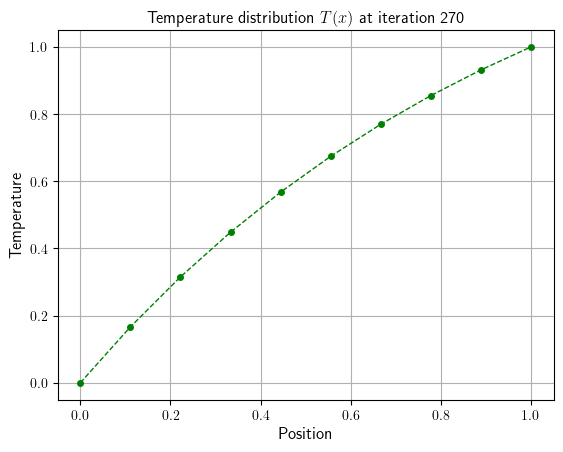

In [254]:
plt.plot(x, T, "go--", linewidth=1, markersize=4)
plt.xlabel("Position", fontsize=12)
plt.ylabel("Temperature", fontsize=12)
plt.grid()
plt.title(f"Temperature distribution $T(x)$ at iteration {iteration}", fontsize=12);